## UNDERSTANDING AND CLEANING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv") # importing the dataset

In [3]:
df.shape # dataset has 30000 rows and 24 columns

(30000, 24)

In [4]:
df.sample(5) # it avoids any biasness and displays data randomly

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
21775,241,3,Las Vegas,4,11-01-2025,27-02-2025,04-03-2025,Standard,1,Business,...,29075,Credit Card,Yes,0.000000,Web,Confirmed,06-08-2024,10.653038,0.00000,No
12020,142,1,Miami,5,05-09-2024,25-10-2024,30-10-2024,Standard,1,Business,...,30408,Bank Transfer,Yes,569.988271,Web,Failed,12-05-2024,8.287626,0.00000,No
11513,110,3,Miami,4,30-08-2024,23-10-2024,29-10-2024,Standard,1,Leisure,...,30906,PayPal,Yes,252.026742,Android,Confirmed,18-05-2024,3.664467,0.00000,No
5076,423,7,Las Vegas,3,06-06-2024,12-07-2024,15-07-2024,Deluxe,3,Leisure,...,20299,PayPal,Yes,0.000000,Web,Confirmed,31-10-2024,0.000000,10.49832,Yes
10823,8,3,Boston,4,21-08-2024,NaN,NaN,Standard,3,Leisure,...,46419,Credit Card,Yes,140.309299,Web,Cancelled,20-05-2024,2.040096,0.00000,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [6]:
# changing data types

df['check_out_date'] = pd.to_datetime(df['check_out_date'], format='%d-%m-%Y')
df['check_in_date'] = pd.to_datetime(df['check_in_date'], format='%d-%m-%Y')
df['booking_date'] = pd.to_datetime(df['booking_date'], format='%d-%m-%Y')
df['travel_date'] = pd.to_datetime(df['travel_date'], format='%d-%m-%Y')

In [7]:
df.duplicated().sum() # there are no duplicate values

np.int64(0)

In [8]:
df.describe() # mathematical summary

,customer_id,property_id,star_rating,booking_date,check_in_date,check_out_date,num_rooms_booked,booking_value,costprice,markup,selling_price,refund_amount,travel_date,cashback,coupon_redeem
count,30000.000000,30000.000000,30000.000000,30000,24532,24532,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000,30000.000000,30000.000000
mean,249.721767,3.777533,3.602033,2024-10-14 12:00:02.880000,2024-11-14 03:36:32.401760768,2024-11-18 03:46:24.086091520,1.352333,25080.525454,22541.494100,6963.32440,29504.818500,320.938376,2024-07-24 03:53:11.040000,3.831534,4.134988
min,1.000000,1.000000,2.000000,2024-04-01 00:00:00,2024-04-02 00:00:00,2024-04-04 00:00:00,1.000000,1279.770000,3822.000000,1181.00000,5003.000000,0.000000,2024-03-02 00:00:00,0.000000,-3.532183
25%,123.000000,1.000000,3.000000,2024-07-08 00:00:00,2024-08-08 00:00:00,2024-08-12 00:00:00,1.000000,15922.712500,15088.750000,4661.75000,19750.500000,0.000000,2024-05-28 00:00:00,0.000000,0.000000
50%,248.000000,3.000000,4.000000,2024-10-14 12:00:00,2024-11-16 00:00:00,2024-11-19 12:00:00,1.000000,24736.145000,22731.000000,7021.50000,29752.500000,221.141185,2024-07-23 00:00:00,1.030180,0.000000
75%,376.000000,5.000000,4.000000,2025-01-21 00:00:00,2025-02-20 00:00:00,2025-02-25 00:00:00,2.000000,33570.000000,30427.000000,9399.00000,39826.000000,594.624344,2024-09-08 00:00:00,7.378533,0.000000
max,499.000000,7.000000,5.000000,2025-04-30 00:00:00,2025-06-28 00:00:00,2025-07-03 00:00:00,3.000000,67764.460000,38200.000000,11800.00000,50000.000000,1462.725105,2025-01-29 00:00:00,21.268013,89.644917
std,145.484836,2.081471,0.860241,NaN,NaN,NaN,0.574403,11587.369335,9259.520787,2860.10657,12119.627338,339.635396,NaN,4.783590,10.846221


In [9]:
df.isnull().sum() # counting null values

customer_id              0
property_id              0
city                     0
star_rating              0
booking_date             0
check_in_date         5468
check_out_date        5468
room_type                0
num_rooms_booked         0
stay_type                0
booking_channel          0
booking_value            0
costprice                0
markup                   0
selling_price            0
payment_method           0
refund_status            0
refund_amount            0
channel_of_booking       0
booking_status           0
travel_date              0
cashback                 0
coupon_redeem            0
Coupon USed?             0
dtype: int64

In the dataset, 'check_in_date' and 'check_out_date' columns have 5468 values missing.

In [10]:
df[df["check_in_date"].isna()]["booking_status"].unique()

array(['Cancelled', 'Failed'], dtype=object)

The missing values in 'check_in_date' and 'check_out_date' columns are due to bookings that were either cancelled or failed, hence no actual stay dates were recorded.

## INSIGHTS AND VISUALIZATIONS

### Booking pattern across different channels

In [11]:
# Group by both channel levels
channel_pattern = df.groupby(['booking_channel', 'channel_of_booking']).size().reset_index(name='Booking_Count')

# Pivot for clear comparison
channel_pattern_pivot = channel_pattern.pivot(index='booking_channel', columns='channel_of_booking', values='Booking_Count').fillna(0)

print(channel_pattern_pivot)

# plot
fig = px.sunburst(channel_pattern, path=("booking_channel", "channel_of_booking"), 
                  values="Booking_Count", 
                  title="Booking Patterns across Channels")
fig.update_traces(textinfo="label+percent entry")
fig.show()

channel_of_booking  Android   Web   iOS
booking_channel                        
Mobile App             3752  6385  1872
Travel Agent            966  1619   405
Web                    4787  8019  2195


The booking pattern shows that most customers prefer direct digital channels, with the Web (50%) and Mobile App (40%) together covering 90% of all bookings. Travel Agents contribute only 10%, making them the least preferred option. Within each channel, the Web option is dominant, followed by Android, while iOS is consistently the least used. This indicates a strong Web-first booking behavior, along with higher usage of Android compared to iOS across all channels.

Possible Reasons:

Customers may be choosing the Web platform over the Mobile App due to several UI/UX factors. The website might offer easier navigation, clearer information, and a more familiar experience compared to the app. Users also tend to trust websites more for transparent pricing and detailed reviews. In contrast, the app may face issues like limited features, technical glitches, or slower performance, leading customers to prefer the Web. Additionally, customer habits, especially those booking on desktop or laptop, naturally favor websites over apps. The stronger presence of Android over iOS may simply reflect a larger Android user base.

Business Recommendations:

The hotel should continue strengthening its Web platform, as it is the most popular booking method, while also working to improve the Mobile App’s user experience. Investing in smoother navigation, faster performance, and more features within the app could encourage customers to use it more often. Special focus should be given to Android optimization since it accounts for a larger share than iOS. Finally, as Travel Agents contribute only a small portion of bookings, partnerships with them may be reconsidered or limited, allowing the business to prioritize and grow its direct digital channels.

### Booking pattern across different room type

In [12]:
# Groupby room type
room_pattern = df.groupby("room_type").size().reset_index(name = "Booking_count")
print(room_pattern)

# Plot
fig = px.pie(room_pattern, names="room_type", values="Booking_count", title="Booking Patterns across room types")
fig.show()

  room_type  Booking_count
0    Deluxe          10478
1  Standard          16552
2     Suite           2970


The data shows that Standard rooms have the highest number of bookings (16,552), followed by Deluxe rooms (10,478), while Suites record the lowest bookings (2,970). This indicates that Standard rooms are the most preferred option, likely due to their affordability, wider availability, and suitability for the majority of travelers, such as solo guests, families, and business travelers. Deluxe rooms also show a strong demand, reflecting that a significant portion of customers are willing to pay more for added comfort and amenities. In contrast, Suites contribute only a small share of bookings, suggesting they cater to a niche market with specific needs such as luxury stays, special occasions, or extended visits.

### Booking pattern across star ratings

In [13]:
# Avg, max, min star ratings
print(f"Mean star rating:{df["star_rating"].mean()}")
print(f"Max star rating:{df["star_rating"].max()}")
print(f"Min star rating:{df["star_rating"].min()}")

Mean star rating:3.6020333333333334
Max star rating:5
Min star rating:2


In [14]:
# Groupby ratings
ratings_pattern = df.groupby("star_rating").size().reset_index(name="rating_count")
print(ratings_pattern)

# Plot
fig = px.bar(ratings_pattern, x="star_rating", y="rating_count")
fig.show()

   star_rating  rating_count
0            2          2995
1            3         10460
2            4         12034
3            5          4511


The distribution shows that most customers rated their stays 3 or 4 (10,460 and 12,034 ratings, respectively). This suggests that the majority of experiences were satisfactory to good, but not exceptional. A smaller portion of customers gave a perfect 5 rating (4,511 ratings), reflecting highly satisfied guests, while low ratings of 2 (2,995 ratings) are the least frequent. This pattern indicates that customer experiences lean more toward the average-to-positive side, with relatively fewer extreme opinions on either end.

## Cancellation Behaviour

booking_status
Confirmed    72.240000
Cancelled    20.233333
Failed        7.526667
Name: proportion, dtype: float64


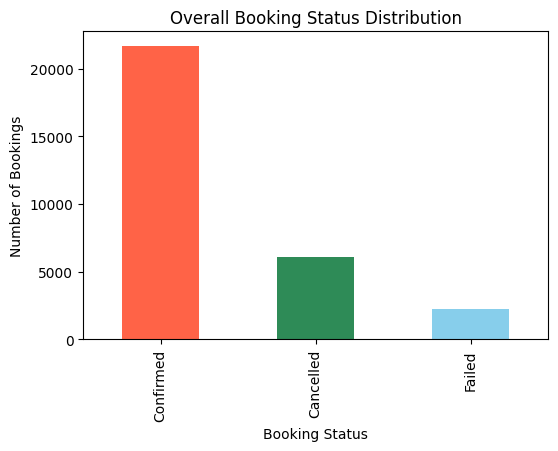

In [15]:
# Cancellation rate
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100
print(cancellation_rate)

# Plot
df["booking_status"].value_counts().plot(
    kind="bar", figsize=(6,4), color=["tomato","seagreen","skyblue"]
)
plt.title("Overall Booking Status Distribution")
plt.ylabel("Number of Bookings")
plt.xlabel("Booking Status")
plt.show()

In [16]:
# Cancellations by Room Type
cancel_by_room = df[df['booking_status'] == 'Cancelled']['room_type'].value_counts(normalize=True) * 100
print(cancel_by_room)

room_type
Standard    63.542010
Deluxe      27.660626
Suite        8.797364
Name: proportion, dtype: float64


In [17]:
# Cancellations by Booking Channel
cancel_by_channel = df[df['booking_status'] == 'Cancelled']['booking_channel'].value_counts(normalize=True) * 100
print(cancel_by_channel)

booking_channel
Web             43.591433
Mobile App      42.652389
Travel Agent    13.756178
Name: proportion, dtype: float64


In [18]:
# Cancellations by Payment Method
cancel_by_payment = df[df['booking_status'] == 'Cancelled']['payment_method'].value_counts(normalize=True) * 100
print(cancel_by_payment)

payment_method
PayPal           25.996705
Debit Card       25.485997
Credit Card      25.387150
Bank Transfer    23.130148
Name: proportion, dtype: float64


In [19]:
# Effect of Coupons on Cancellation
cancel_with_coupon = df[df['booking_status'] == 'Cancelled']['Coupon USed?'].value_counts(normalize=True) * 100
print(cancel_with_coupon)

Coupon USed?
No     78.78089
Yes    21.21911
Name: proportion, dtype: float64


In [20]:
# Cancellation vs. Refund
cancel_refund = df[df['booking_status'] == 'Cancelled']['refund_status'].value_counts(normalize=True) * 100
print(cancel_refund)

refund_status
Yes    77.940692
No     22.059308
Name: proportion, dtype: float64


In [21]:
# Cancellation by Star Rating (Property Quality)
cancel_by_star = df[df['booking_status'] == 'Cancelled']['star_rating'].value_counts(normalize=True) * 100
print(cancel_by_star)

star_rating
4    39.637562
3    34.810544
5    15.799012
2     9.752883
Name: proportion, dtype: float64


The cancellation analysis reveals that overall cancellations stand at about 20%, with the majority of them occurring in standard room bookings (~63.5%), followed by deluxe (~27.6%) and suites (~8.8%), indicating that lower-priced options are more prone to cancellation. Booking channels such as web (~43.6%) and mobile app (~42.7%) show nearly equal shares of cancellations, suggesting no major influence of platform, while travel agents contribute a smaller share (~13.8%). Payment methods, including credit, debit, and PayPal, each account for around 25% of cancellations, with bank transfers slightly lower at 23%, indicating that payment type is not a strong driver. Coupon usage patterns show that cancellations are much higher among customers booking without coupons (~79%) compared to those with coupons (~21%), suggesting discounts increase commitment. Furthermore, about 78% of cancellations are associated with refunds, which may encourage casual cancellations.

A possible reason behind these patterns could be that customers booking standard rooms are more price-sensitive, leading to last-minute plan changes or switching to cheaper alternatives. The high cancellation rates with refunds suggest that customers take advantage of flexible policies, booking without firm commitment. Similarly, the lower cancellation rates among coupon users indicate that discounts create a psychological attachment and reduce the likelihood of dropping the booking. The negligible difference across booking channels and payment methods implies that convenience is not the core driver, rather customer intent and pricing dynamics play a stronger role.

In [22]:
# Check customers with repeated cancellations

# Count total bookings and cancellations per customer
customer_cancellation = df.groupby("customer_id")["booking_status"].value_counts().unstack(fill_value=0)

# Add a cancellation ratio
customer_cancellation["cancel_ratio"] = (
    customer_cancellation["Cancelled"] / customer_cancellation.sum(axis=1)
)

# Flag high-cancellation users (threshold = 60%)
high_cancellers = customer_cancellation[customer_cancellation["cancel_ratio"] > 0.6]

print(high_cancellers.values)

[]


No customer was found with a very high cancellation rate (above 60%), indicating that cancellations are spread across the user base rather than caused by a few specific customers.

In [23]:
# Look for multiple active bookings for same travel date

# Count how many bookings each customer made for the same travel_date
multi_booking = df.groupby(["customer_id", "travel_date"]).size().reset_index(name="num_bookings")

# Filter customers who booked more than once for the same date
multi_booking[multi_booking["num_bookings"] > 1]

,customer_id,travel_date,num_bookings
8,1,2024-04-07,2
10,1,2024-04-21,2
18,1,2024-06-02,3
19,1,2024-06-05,2
27,1,2024-06-26,2
...,...,...,...
26083,499,2024-05-15,2
26086,499,2024-05-23,2
26101,499,2024-08-31,2
26107,499,2024-09-14,2


In [24]:
# Filter original data for only these multi-bookers
df_multi = df.merge(multi_booking[["customer_id", "travel_date"]], on=["customer_id", "travel_date"], how="inner")

# Calculate cancellation rate for these customers
cancellation_stats = df_multi.groupby("customer_id").agg(
    total_bookings=("booking_status", "count"),
    total_cancellations=("booking_status", lambda x: (x == "Cancelled").sum())
).reset_index()

cancellation_stats["cancellation_rate"] = (cancellation_stats["total_cancellations"] / cancellation_stats["total_bookings"]) * 100

# Find top cancelling customers
top_cancellers = cancellation_stats.sort_values(by="cancellation_rate", ascending=False)

# See which booking channels are most used for cancellations
channel_cancellations = df_multi[df_multi["booking_status"] == "Cancelled"].groupby("booking_channel").size().reset_index(name="cancellations")

# Display results
print("Multi-booker cancellation behavior:")
print(top_cancellers.head(10))

print("\nChannels most affected by cancellations:")
print(channel_cancellations)

Multi-booker cancellation behavior:
     customer_id  total_bookings  total_cancellations  cancellation_rate
114          115              48                   20          41.666667
207          208              20                    8          40.000000
12            13              52                   18          34.615385
292          293              58                   20          34.482759
115          116              80                   27          33.750000
84            85              69                   23          33.333333
498          499              57                   19          33.333333
424          425              58                   19          32.758621
364          365              41                   13          31.707317
112          113              51                   16          31.372549

Channels most affected by cancellations:
  booking_channel  cancellations
0      Mobile App           2589
1    Travel Agent            835
2             Web   

Some customers cancel frequently, but none cross the “extreme” 60% cancellation threshold. Still, I found a set of multi-bookers with cancellation rates around 30–40%, which is relatively high and can hurt business revenue.
In terms of channels, the Mobile App and Web show the highest number of cancellations (2,589 and 2,646 respectively), while Travel Agents account for fewer cancellations (835). This shows that online, self-service platforms are more prone to cancellation behavior compared to mediated bookings.

Possible Reasons:

Customers using apps and web portals can cancel with just a few clicks, so convenience might be driving the higher cancellation rate.
Repeat customers with moderately high cancellation rates may be “speculative bookers,” i.e., booking multiple options and finalizing later.
Travel agent bookings have fewer cancellations, possibly because of stricter policies, advance payments, or personal interaction discouraging cancellations.

Recommendations:

Introduce stricter cancellation policies (like partial non-refundable amounts) for high-frequency cancellers or speculative bookers.
On the mobile app and web, offer incentives for non-cancellable discounted bookings (e.g., “Save 10% if you confirm without free cancellation”).
Flag repeat customers with high cancellation behavior and send them targeted offers, reminders, or warnings.
For travel agents, the lower cancellations suggest that human mediation works (consider introducing a similar support/confirmation system for online bookings).

booking_status  Cancelled  Confirmed    Failed
Coupon USed?                                  
No               0.200865   0.725291  0.073844
Yes              0.207977   0.711287  0.080736
booking_status  Cancelled  Confirmed    Failed
cashback                                      
0.000000         0.198137   0.727142  0.074721
0.507662         0.500000   0.500000  0.000000
0.537409         0.000000   1.000000  0.000000
0.538850         0.000000   0.500000  0.500000
0.555062         0.500000   0.500000  0.000000
...                   ...        ...       ...
20.552876        0.000000   1.000000  0.000000
21.124024        0.000000   1.000000  0.000000
21.133242        0.000000   1.000000  0.000000
21.161835        0.250000   0.500000  0.250000
21.268013        0.000000   0.750000  0.250000

[7798 rows x 3 columns]


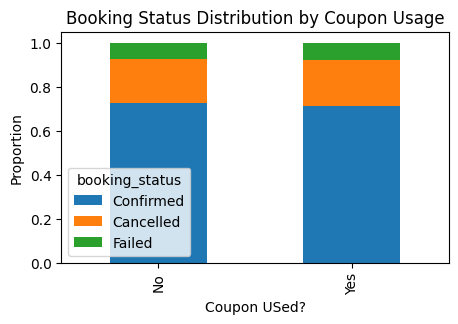

In [25]:
# Check coupon/cashback usage in cancellations

# Cancellation rate with vs without coupons
coupon_cancel = df.groupby("Coupon USed?")["booking_status"].value_counts(normalize=True).unstack(fill_value=0)
print(coupon_cancel)

# Cashback impact
cashback_cancel = df.groupby("cashback")["booking_status"].value_counts(normalize=True).unstack(fill_value=0)
print(cashback_cancel)

# Coupon vs Booking Status plot
coupon_plot = coupon_cancel.groupby("Coupon USed?")[["Confirmed", "Cancelled", "Failed"]].mean()
coupon_plot.plot(kind="bar", stacked=True, figsize=(5,3))
plt.title("Booking Status Distribution by Coupon Usage")
plt.ylabel("Proportion")
plt.show()


Coupon usage – The cancellation rate for bookings with a coupon (20.8%) is almost the same as those without a coupon (20.1%). This shows that coupons are not a major driver of cancellations; people are cancelling regardless of coupon use.

Cashback impact – For cashback, cancellation rates vary widely across different cashback values. At 0 cashback, cancellation is around 19.8%, but at some cashback levels, it jumps to 50%. This suggests that certain cashback offers may encourage trial bookings that don’t convert.

Possible Reasons:

Customers might be booking with offers just to reserve a slot and cancelling later if plans change.
Cashback offers may attract price-sensitive or non-serious customers who cancel more frequently.
Coupons alone don’t influence cancellations much, but cashback fluctuations might be linked to specific promotions.

Business Recommendations:

Coupons can still be promoted confidently since they don’t raise cancellation risk.
For cashback, identify the cashback levels with very high cancellations and reconsider or redesign those campaigns (e.g., cap cashback, add stricter conditions).
Introduce penalties or reduced benefits for frequent cancellers to discourage misuse of offers.
Track customer cohorts (new vs. returning) to see if cancellations from cashback-heavy users are driven by first-time opportunistic buyers.

## What might be the reasons for the observed cancellation patterns?

Customers booking standard rooms tend to be more price-sensitive, which can lead to last-minute changes or cancellations. High cancellation rates with refunds suggest that many take advantage of flexible policies, booking without firm commitment. Discount coupons seem to reduce cancellations, as customers feel more attached to their booking, while cashback offers may attract more price-sensitive or non-serious customers who cancel more often. Convenience also plays a role: bookings via apps or websites can be cancelled easily, contributing to higher cancellation rates. Repeat customers sometimes book multiple options and cancel later, while travel agent bookings see fewer cancellations, likely due to stricter policies, advance payments, or personal interaction. Overall, pricing, customer intent, and booking flexibility appear to influence cancellations more than the channel or payment method.

## Why do some property types perform better than others?

In [26]:
# Booking volume per property

# Group by both channel levels
booking_volume = df.groupby(['property_id']).size().reset_index(name='Booking_Count')
print(booking_volume)

# plot
fig = px.pie(booking_volume, names="property_id", values="Booking_Count", title="Performance of Properties")

fig.show()

   property_id  Booking_Count
0            1           7810
1            3           7589
2            5           9729
3            7           4872


Property 5 has the highest number of bookings and generates the maximum revenue, followed by Properties 1 and 3, while Property 7 consistently underperforms.

             booking_value  selling_price    markup
property_id                                        
1             1.958971e+08      230165914  54320633
3             1.909854e+08      223972908  52859014
5             2.435821e+08      287071895  67750809
7             1.219512e+08      143933838  33969276


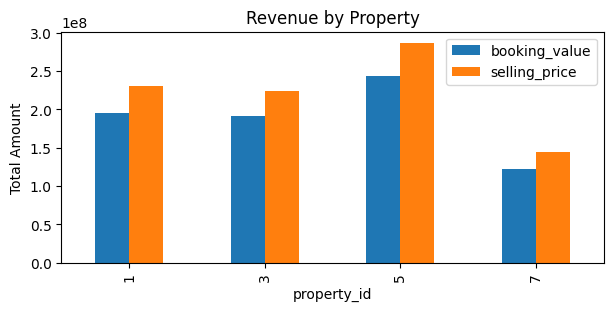

In [27]:
# Revenue and profitability
revenue_profit = df.groupby("property_id").agg({
    "booking_value": "sum",
    "selling_price": "sum",
    "markup": "sum"
})
print(revenue_profit)

# Revenue comparison plot
revenue_profit[["booking_value","selling_price"]].plot(kind="bar", figsize=(7,3))
plt.title("Revenue by Property")
plt.ylabel("Total Amount")
plt.show()


Property 5 not only drives the most revenue but also has the highest markup contribution, showing strong profitability.

property_id
1    0.203713
3    0.208987
5    0.197965
7    0.198481
Name: booking_status, dtype: float64
property_id
1    2.479508e+06
3    2.398621e+06
5    3.201560e+06
7    1.548463e+06
Name: refund_amount, dtype: float64


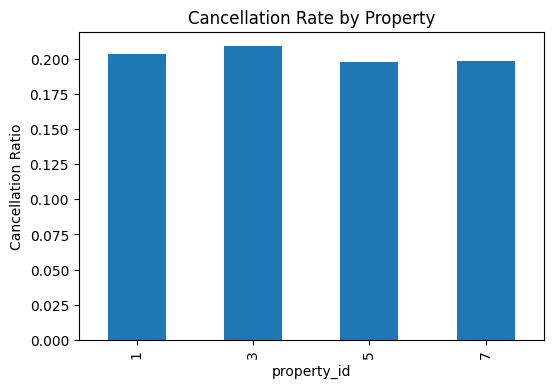

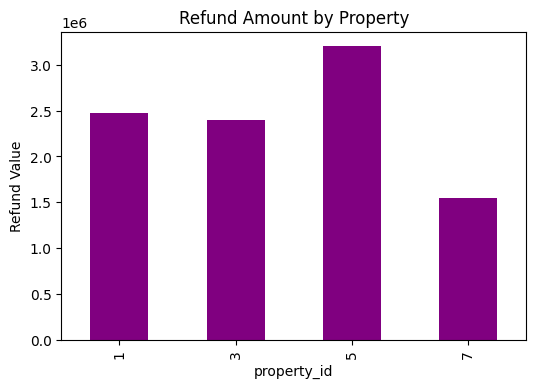

In [28]:
# Cancellation & refund impact
cancellation_rate = df.groupby("property_id")["booking_status"].apply(
    lambda x: (x == "Cancelled").mean()
)
refunds = df.groupby("property_id")["refund_amount"].sum()

print(cancellation_rate)
print(refunds)

# Cancellation rate
cancellation_rate.plot(kind="bar", figsize=(6,4), title="Cancellation Rate by Property")
plt.ylabel("Cancellation Ratio")
plt.show()

# Refunds
refunds.plot(kind="bar", color="purple", figsize=(6,4), title="Refund Amount by Property")
plt.ylabel("Refund Value")
plt.show()

Cancellation Rate (Top Chart):
All four properties (1, 3, 5, 7) show a similar cancellation rate of around 20%, with Property 3 being slightly higher. This means cancellations occur at almost the same frequency across properties.

Refund Amount (Bottom Chart):
Despite similar cancellation rates, the refund values vary significantly:
Property 5 has the highest refund amount, suggesting it handles higher-value bookings that lead to costlier cancellations.
Properties 1 and 3 also have substantial refund amounts, though lower than Property 5.
Property 7 has the lowest refund amount, implying its bookings are either fewer in value or lower-priced.

property_id
1    3.614725
3    3.602978
5    3.589269
7    3.605706
Name: star_rating, dtype: float64


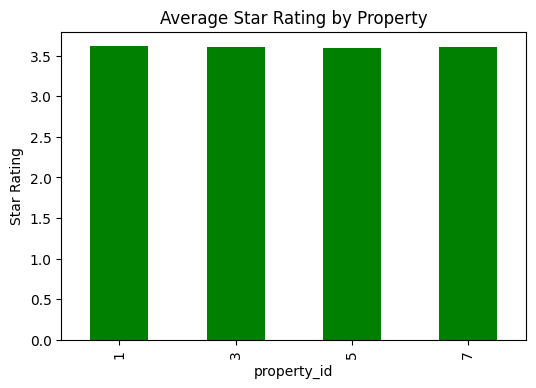

In [29]:
# Star rating performance
avg_rating = df.groupby("property_id")["star_rating"].mean()
print(avg_rating)

# plot
avg_rating.plot(kind="bar", color="green", figsize=(6,4), title="Average Star Rating by Property")
plt.ylabel("Star Rating")
plt.show()

Star ratings are fairly stable (between 3.58–3.61) across all properties, suggesting customer experience is relatively uniform.

stay_type    Business  Leisure
property_id                   
1                3189     4621
3                3043     4546
5                3760     5969
7                1898     2974


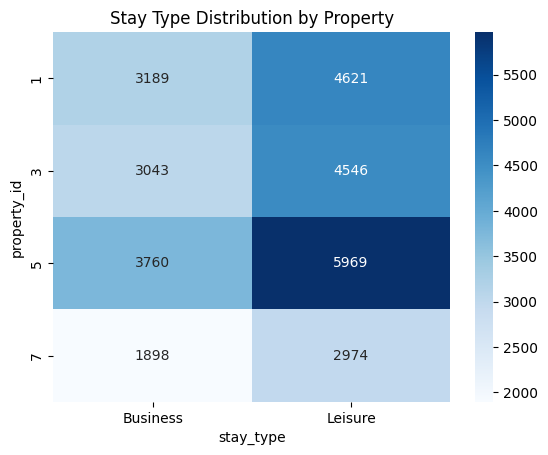

In [30]:
# Stay type distribution
stay_dist = df.groupby(["property_id", "stay_type"]).size().unstack(fill_value=0)
print(stay_dist)

# Stay type heatmap
sns.heatmap(stay_dist, annot=True, fmt="d", cmap="Blues")
plt.title("Stay Type Distribution by Property")
plt.show()

Property 5 dominates in both business and leisure stays, making it attractive to diverse customer segments, while Property 7 is weaker in both segments

booking_channel  Mobile App  Travel Agent   Web
property_id                                    
1                      3068           800  3942
3                      3027           757  3805
5                      3980           963  4786
7                      1934           470  2468


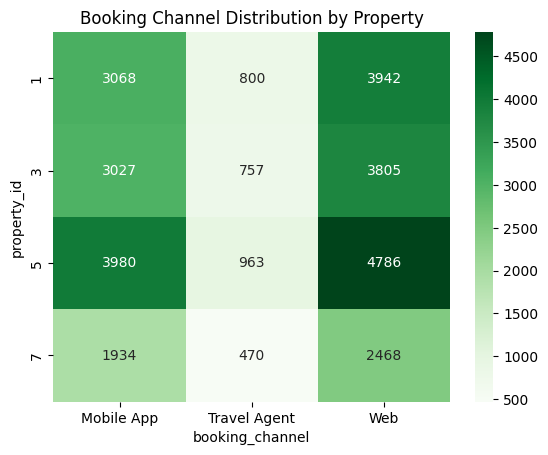

In [31]:
# Booking channel mix
channel_dist = df.groupby(["property_id", "booking_channel"]).size().unstack(fill_value=0)
print(channel_dist)

# Booking channel distribution plot
sns.heatmap(channel_dist, annot=True, fmt="d", cmap="Greens")
plt.title("Booking Channel Distribution by Property")
plt.show()

Property 5 captures the largest share across web and mobile app channels, which likely boosts its overall performance. Property 7 is again the weakest across all booking channels.

Possible Reasons Why Some Properties Perform Better:

Property 5 performs strongly across both business and leisure stays, unlike Property 7, which has weaker appeal in both segments. Stronger distribution across web and mobile channels gives Properties 5, 1, and 3 better visibility and access to customers. Property 5 shows effective pricing and markup strategies, driving higher profitability without significantly higher cancellation rates. Properties with better connectivity or central locations (possibly 1, 3, 5) tend to outperform. Higher refunds in Property 1 and 3 suggest operational inefficiencies or customer dissatisfaction compared to Property 5.

Business Recommendations

Study Property 5 success factors (pricing, location, channel mix, stay diversity) and apply similar strategies to underperforming properties like Property 7.
Increase web and app visibility through targeted promotions or exclusive deals to drive higher booking volumes.
For Properties 1 and 3, tighten refund policies or improve booking experience to reduce cancellations and associated costs.
Property 7 could focus on business travel promotions (corporate packages) or leisure discounts (weekend deals) to balance stay type distribution.
Encourage add-on services (meals, transport, experiences) in high-performing properties like 5 to further boost revenue while using customer insights to enhance weaker ones.
Since ratings are similar across properties, focus more on pricing, channel strategy, and stay type targeting rather than quality upgrades.

## Are there seasonal or temporal trends influencing booking values or stay lengths?

booking_month
1     23424.240288
2     27806.446412
3     27316.317513
4     25116.494933
5     23197.152432
6     24202.785705
7     25501.593859
8     26064.735975
9     24635.105197
10    24880.617462
11    25753.245326
12    23276.987242
Name: booking_value, dtype: float64


<Axes: title={'center': 'Avg Booking Value by Month'}, xlabel='booking_month'>

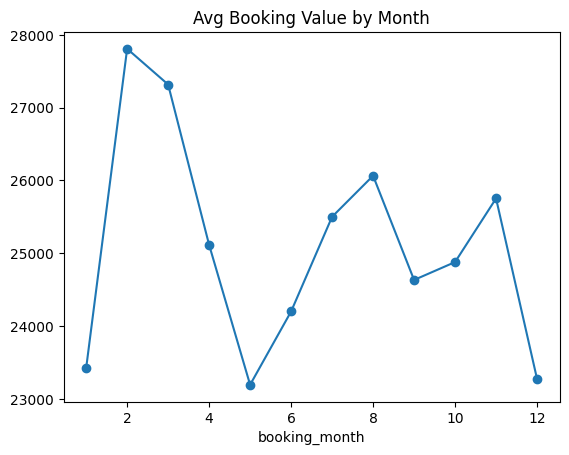

In [32]:
# Booking Value by Month
df['booking_month'] = df['booking_date'].dt.month
monthly_booking_value = df.groupby('booking_month')['booking_value'].mean()
print(monthly_booking_value)

# plot
monthly_booking_value.plot(kind='line', marker='o', title="Avg Booking Value by Month")

Highest booking values are seen in February (~27,806) and March (~27,316).

The lowest booking values appear in December (~23,276) and May (~23,197).

This indicates peak demand in late winter and early spring, with a dip towards year-end and early summer.

booking_month
1     4.061193
2     4.057159
3     3.888542
4     4.044145
5     3.986486
6     4.023467
7     4.031151
8     4.003648
9     4.007576
10    3.986444
11    3.986849
12    3.975065
Name: stay_length, dtype: float64


<Axes: title={'center': 'Avg Stay Length by Month'}, xlabel='booking_month'>

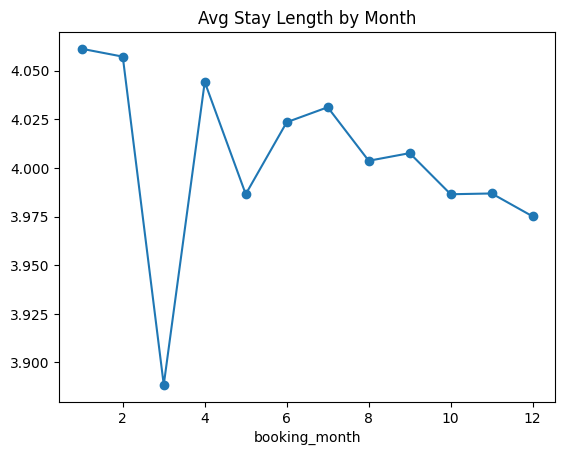

In [33]:
# Average stay length by month
df['stay_length'] = (df['check_out_date'] - df['check_in_date']).dt.days
monthly_stay_length = df.groupby('booking_month')['stay_length'].mean()
print(monthly_stay_length)


# plot
monthly_stay_length.plot(kind='line', marker='o', title="Avg Stay Length by Month")


Average stay length remains fairly consistent (around 3.9-4.1 days).

Slightly longer stays occur in April (4.04 days) and Thursday check-ins (4.07 days).

Shorter stays are seen in March (3.88 days) and Fridays (3.94 days).

In [34]:
# Define a function to assign seasons based on check-in month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
# Apply season mapping
df['season'] = df['check_in_date'].dt.month.apply(assign_season)

# Group by season to calculate averages
seasonal_stats = df.groupby('season').agg({
    'booking_value': 'mean',
    'stay_length': 'mean'
}).reset_index()

print(seasonal_stats)

   season  booking_value  stay_length
0  Autumn   25089.012228     3.987227
1  Spring   25911.610757     4.020178
2  Summer   24621.047419     4.015666
3  Winter   24499.453743     4.000000


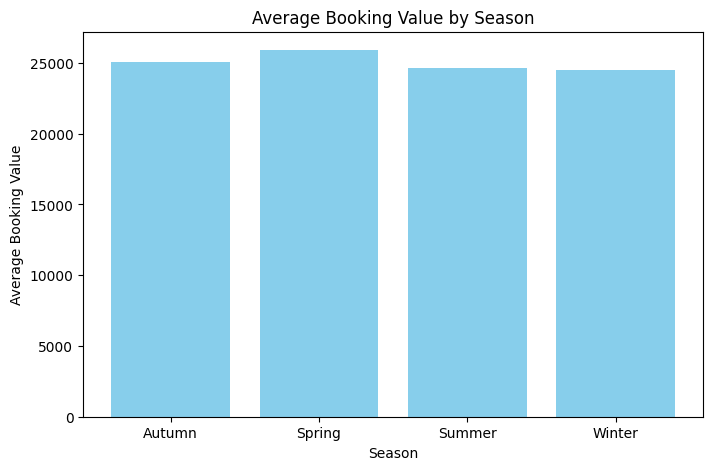

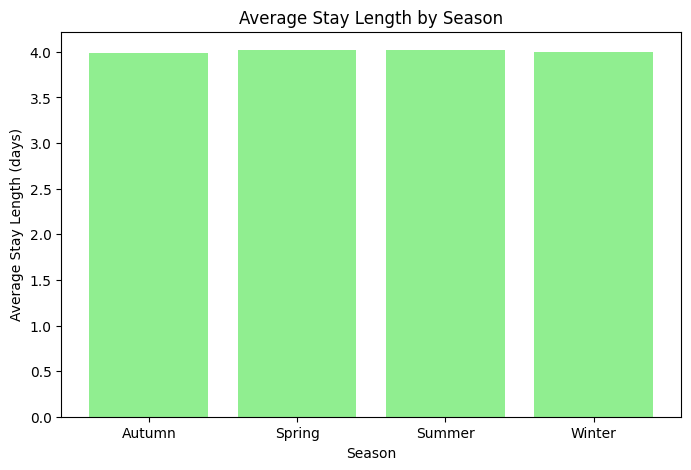

In [35]:
# Booking Value by Season plot
plt.figure(figsize=(8,5))
plt.bar(seasonal_stats['season'], seasonal_stats['booking_value'], color='skyblue')
plt.title("Average Booking Value by Season")
plt.xlabel("Season")
plt.ylabel("Average Booking Value")
plt.show()

# Stay Length by Season plot
plt.figure(figsize=(8,5))
plt.bar(seasonal_stats['season'], seasonal_stats['stay_length'], color='lightgreen')
plt.title("Average Stay Length by Season")
plt.xlabel("Season")
plt.ylabel("Average Stay Length (days)")
plt.show()


Spring has the highest booking value (~25,911) with an average stay length of 4.02 days.

Winter records the lowest booking value (~24,499), though stay length (~4.0 days) is consistent.

Seasonal differences in stay length are marginal, but booking values vary by nearly ₹1,500-1,800 between high and low seasons

In [36]:
# Day-of-Week Patterns
df['check_in_day'] = pd.to_datetime(df['check_in_date']).dt.day_name()
weekday_analysis = df.groupby('check_in_day').agg({'booking_value':'mean','stay_length':'mean'})
print(weekday_analysis)

              booking_value  stay_length
check_in_day                            
Friday         25113.914726     3.946959
Monday         25173.290968     3.991691
Saturday       25002.874219     4.055571
Sunday         25045.322666     4.000296
Thursday       24956.448471     4.071489
Tuesday        25164.392726     3.988701
Wednesday      25408.240237     3.994581


Highest booking values are on Wednesdays (~25,408) and Mondays (~25,173).

Lowest values are on Thursdays (~24,956).

Guests checking in on Thursdays and Saturdays tend to stay longer (4.07 and 4.05 days) compared to those arriving on Fridays (3.94 days).

*Yes*, there are seasonal and temporal trends influencing booking values and stay lengths:
Booking values peak in late winter and spring (Feb–Mar, Spring season), while they are lowest in December and May (Winter and early summer).
Stay lengths are relatively stable across months and seasons (~4 days), with minor variations depending on day of check-in (slightly longer on Thursdays/Saturdays).
Day-of-week trends show that mid-week (Wednesdays) attracts higher-value bookings, while weekend stays are slightly longer but lower in booking value.